# Final Project Submission

# Metadata

Final project for DS5100

7/15/22

Kate Meldrum

kmm4ap

Notebook URL: https://github.com/meldrumkathryn/DS5100_Final/blob/main/final-project-submission.ipynb

Project repo url: https://github.com/meldrumkathryn/DS5100_Final

# Montecarlo Module:

In [1]:
import numpy as np
import pandas as pd
import random


# Shortcuts:

six_faces = [1, 2, 3, 4, 5, 6]


class die:
    
    '''
    A die has N sides, or “faces”, and W weights, and can be rolled to select a face
    '''
    
    def __init__(self,faces):
        
        '''
        purpose: create instance of class die
        param: <array> of faces on die
        return: None
        '''
        
        weights = [1.0 for x in faces] # Create default weights
        
        #die attributes
        self.faces = faces
        self.weights = weights
        self.__fwdf__ = pd.DataFrame(self.weights, index=self.faces)
        self.__fwdf__.columns = ['Weight']
        self.__fwdf__.index.name = 'Faces'
        
    def change_weight(self, face, weight):
        
        '''
        purpose: change weight given to a face of die in roll
        param1: <string, int, float> face to weight
        param2: <int or float> weight to be given to face 
        return: None
        '''
        
        # must be existing face and numeric weight
        if face in self.faces: 
            if type(weight)==float or type(weight)==int:
                i = self.faces.index(face)
                self.weights[i] = float(weight)
                self.__fwdf__ = pd.DataFrame(self.weights, index=self.faces)
                self.__fwdf__.columns = ['Weight']
                self.__fwdf__.index.name = 'Faces'
            else:
                print('Weight must be entered as float or int')
        else: 
            print('Face does not exist on this die')
            
    def roll_die(self, rolls=1):
        
        '''
        purpose: return a random face of die with condiseration to weights
        param: <int >number of rolls 
        return: <list> face values
        '''
        
        # random.choices pulls sample with replacement
        return random.choices(self.faces, weights=self.weights, k=rolls)
    
    def display(self):
        
        '''
        purpose: user can see faces and weights of die instance
        return: dataframe
        '''
        
        # allows users to access private face weight dataframe
        return self.__fwdf__


class game: 
    
    '''
    A game consists of rolling of one or more dice of the same list of faces one or more times
    '''
    
    # Default dice
    die1 = die(six_faces)
    die2 = die(six_faces)
    die3 = die(six_faces)
    die4 = die(six_faces)
    die5 = die(six_faces)
    die6 = die(six_faces)
    die_list = [die1,die2,die3,die4,die5,die6]
    
    __playdf__ = pd.DataFrame()# Empty data frame to be filled with game results and global amongst functions
    
    def __init__(self, die_list=die_list, __playdf__=__playdf__):
        
        '''
        purpose: create and isntance of a game
        param: <list of class die> , must have same number of faces
        return: None
        '''
        
        #attributes
        for die in die_list:
            self.die=die
        self.die_list=die_list
        self.__playdf__=__playdf__
        
    def play(self, n=100):
        
        '''
        purpose: roll each die in game a number of times and imput face values into global dataframe
        param: <int> number of rolls
        return: None
        '''
        
        #for each die, roll a certain amount of times and add to dictionary, create private dataframe when all dice have been rolled
        data = {}
        count=1
        for die in self.die_list:
            data["Die "+str(count)] = [die.roll_die()[0] for i in range(n)]
            count+=1
        self.__playdf__ = pd.DataFrame(data, index = range(1, n+1))
    
    def show_rolls(self, wide=True):
        
        '''
        purpose: display results of play function to user
        param: <bool> indicating wide or narrow, defaults to wide
        return: dataframe 
        '''
        
        # allow user to access private play dataframe
        if wide==True: 
            return self.__playdf__
        if wide == False:
            return self.__playdf__.stack()
        else:
            print('Expected argument: True or False')


class analyzer:
    '''
    takes the results of a single game and computes various descriptive statistical properties about it
    '''
    
    game = game()
    game.play()
    
    
    def __init__(self, game=game): 
        '''
        purpose: create and instance of analyzer class
        param: instance of class game
        return: None
        '''
        
        #attributes
        self.game = game
        self.data_type = type(game.show_rolls().iloc[1,1])
        self.jpdf = pd.DataFrame()
                              
    def jackpot(self):
        '''
        purpose: counts the number of rolls in game all dices showed an identical face
        return: <int> number of occurances
        '''
        
        #creates public dataframe, returns length
        df = self.game.show_rolls(True)
        rolls_lst = []
        count = 1
        for i in range(len(df)):
            rolls_lst.append(list(df.iloc[i,:]))
        for roll in rolls_lst:
            if len(set(roll))==1:
                self.jpdf[count]=roll
            count += 1
        self.jpdf = self.jpdf.T
        self.jpdf.index.name = 'Roll #'
        return len(self.jpdf)
    
    def sequence(self, freq=False):
        
        '''
        purpose: method to compute the number of distinct sequences of faces rolled
        param: freq = True/False to sort by frequency or not
        return: dataframe
        '''
        
        df = self.game.show_rolls(True) 
        rolls_lst = []
        
        # Get a list of list of row values
        for i in range(len(df)):   
            rolls_lst.append(list(df.iloc[i,:]))
        
        # Create frequency sorted dataframe    
        if freq == True:
            rolls_dict = {}
            count = 1
            for roll in rolls_lst:
                roll = ''.join([str(i) for i in roll])
                if roll in rolls_dict:
                    rolls_dict[roll][0].append(count)
                    rolls_dict[roll][1] += 1
                if roll not in rolls_dict:
                    rolls_dict[roll] = [[count], 1]
                count += 1

            freq_sdf = pd.DataFrame(rolls_dict).T
            freq_sdf.columns = ['Roll #s', 'Total Frequency']
            freq_sdf.index.name = 'Sequences'
            freq_sdf = freq_sdf.sort_values(by = ['Total Frequency'], ascending = False)
            self.freq_sdf = freq_sdf 
            return self.freq_sdf
        
        # Sequence sorted dataframe with multi-index
        if freq == False: 
            sdf = pd.DataFrame(df.value_counts())
            sdf.columns=['Frequency']
            sdf.index.name = 'Face Values'
            self.sdf = sdf
            return sdf
        
    def combo(self, freq = False):
        
        '''
        purpose: method to compute a dataframe of distinct combinations of faces rolled
        param: freq = True/False to sort by frequency or not
        return: dataframe
        ''' 
        
        df = self.game.show_rolls(True) 
        rolls_lst = []
        
        # Get a list of list of values
        for i in range(len(df)):   
            rolls_lst.append(list(df.iloc[i,:]))
        
        # Create frequency sorted dataframe
        if freq ==True:
            rolls_dict = {}
            count = 1
            for roll in rolls_lst:
                roll = ''.join([str(i) for i in sorted(roll)])
                if roll in rolls_dict:
                    rolls_dict[roll][0].append(count)
                    rolls_dict[roll][1] += 1
                if roll not in rolls_dict:
                    rolls_dict[roll] = [[count], 1]
                count += 1
        
            freq_cdf = pd.DataFrame(rolls_dict).T
            freq_cdf.columns = ['Roll #s', 'Total Frequency']
            freq_cdf.index.name = 'Combination'
            freq_cdf = freq_cdf.sort_values(by = ['Total Frequency'], ascending = False)
            self.freq_cdf = freq_cdf
            return self.freq_cdf
        
        # combo-sorted dataframe with multi-index
        if freq == False: 
            dct = {}
            for i in range(len(rolls_lst)):
                dct[i+1] = sorted(rolls_lst[i])
            dfsorted = pd.DataFrame(dct).T
            cdf = pd.DataFrame(dfsorted.value_counts())
            cdf.columns=['Frequency']
            cdf.index.name = 'Face Values'
            self.cdf = cdf
            return cdf
            
        
    def counts(self):
        
        '''
        purpose: method to compute how many times a given face is rolled in each event
        return: dataframe
        '''
        
        df = self.game.show_rolls(True) 
        rolls_lst = []
        counts_dct = {}
        unique_vals = []
        
        # Get a list of list of values
        for i in range(len(df)):   
            rolls_lst.append(list(df.iloc[i,:]))
    
        # Get a list of all unique values, sort it
        for x in rolls_lst:
            for i in x:
                if i not in unique_vals:
                    unique_vals.append(i)
        unique_vals.sort()
        
        #Iterate through each roll and count how many of each unique val, make a dict of roll counts
        y = 1
        for x in rolls_lst: 
            count = [0 for i in unique_vals]
            for i in x:
                count[unique_vals.index(i)] += 1
            counts_dct[y] = count
            y += 1
            
        # make dataframe
        countsdf = pd.DataFrame(counts_dct).T
        countsdf.columns = unique_vals
        self.countsdf = countsdf
        return self.countsdf

# Test Module:

In [ ]:
import unittest
from monte.montecarlo import *

class montecarlotest(unittest.TestCase):
    
    # Die Class Tests
    
    def test_1_change_weight(self): 
        '''
        purpose: tests change_weight function for if the correct weight was changed to the correct value 
        '''
        testcase = die(['H', 'T'])
        testcase.change_weight('H', 5)
        self.assertTrue(testcase.weights == [5.0, 1.0])
        
    def test_1a_change_weight(self):
        '''
        purpose: tests change_weight funciton for if it only accepts ints/floats as the new weight values and only accepts current face as face argument
        '''
        testcase = die(['H', 'T'])
        condition1 = (testcase.change_weight('H', 'hi')==('Weight must be entered as float or int'))
        condition2 = (testcase.change_weight('L',4)==('Face does not exist on this die'))
        self.assertTrue(condition1 and condition2)
    
    def test_2_roll_die(self):
        '''
        purpose: tests roll_die function to make sure that faces returned on roll exist and the right number of faces are returned
        '''
        testcase = die(['H', 'T'])
        rolls = testcase.roll_die(5)
        test = True
        for each in rolls:
            if each not in testcase.faces:
                test = False
        condition1 = test == True 
        condition2 = (len(rolls) == 5) 
        self.assertTrue(condition1 and condition2)
    
    def test_3_display(self):
        '''
        purpose: tests display function to see if the dataframe produced contains the correct weight values 
        '''
        testcase = die(['H', 'T'])
        testcase.change_weight('H', 5)
        df = testcase.display()
        self.assertTrue(list(df['Weight']) == testcase.weights)
    
    # Game Class Tests
    
    def test_4_play(self):
        '''
        purpose: tests play function to make sure that it creates a dataframe of the correct length (correct number of rolls are returned) and that the dataframe contains a number of columns equal to number of dice in game
        '''
        testcase = game()
        testcase.play(100)
        condition1 = len(testcase.__playdf__)==100
        condition2 = len(testcase.__playdf__.columns)==len(testcase.die_list)
        self.assertTrue(condition1 and condition2)
    
    def test_5_show_rolls(self):
        '''
        purpose: tests show_rolls function to make sure that it returns a dataframe of the correct length (correct number of rolls are returned) and that the dataframe contains a number of columns equal to number of dice in game
        '''
        testcase = game()
        testcase.play(100)
        df = testcase.show_rolls()
        condition1 = len(df)==100
        condition2 = len(df.columns)==len(testcase.die_list)
        self.assertTrue(condition1 and condition2)
    
    # Analyzer Class Tests
    
    def test_6_jackpot(self):
        '''
        purpose: tests jackpot function to make sure it returns a the number of jackpots as equal to the length of the created jackpot dataframe
        '''
        game1 = game()
        game1.play(100)
        testcase = analyzer(game1)
        x = testcase.jackpot()
        self.assertTrue(x == len(testcase.jpdf))
        
    def test_7_sequence(self):
        '''
        purpose: tests sequence function to see if it returns the correctly-dimensioned dataframe for both freqeuncy mode and multiindex mode
        '''
        game2 = game()
        game2.play(100)
        testcase = analyzer(game2)
        x = testcase.sequence()
        condition1 = (len(testcase.sdf) == len(x))
        condition2 = len(x.columns)== len(testcase.sdf.columns)
        y = testcase.sequence(freq=True)
        condition3 = (len(testcase.freq_sdf) == len(y))
        condition4 = len(y.columns)== len(testcase.freq_sdf .columns)
        self.assertTrue(condition1 and condition2 and condition3 and condition4) 
    
    def test_8_combo(self):
        '''
        purpose: tests combo function to see if it returns the correctly-dimensioned dataframe for both freqeuncy mode and multiindex mode
        '''
        game3 = game()
        game3.play(100)
        testcase = analyzer(game3)
        x = testcase.combo()
        condition1 = (len(testcase.cdf) == len(x))
        condition2 = len(x.columns)== len(testcase.cdf.columns)
        y = testcase.combo(freq=True)
        condition3 = (len(testcase.freq_cdf) == len(y))
        condition4 = len(y.columns)== len(testcase.freq_cdf.columns)
        self.assertTrue(condition1 and condition2 and condition3 and condition4) 
        
    def test_9_counts(self):
        '''
        purpose: tests if the counts function returns a dataframe of the correct dimensions
        '''
        game4 = game()
        game4.play(100)
        testcase = analyzer(game4)
        df = testcase.counts()
        condition1 = (len(df)==100)
        self.assertTrue(condition1)
        
if __name__ == '__main__':
    
    unittest.main(verbosity=3)
        

# Test Results

(I had to reformat to make them readable in a markdown cell but my true txt file can be found on github!)

(base) Kates-MacBook-Air:DS5100_Final meldrumapple$ python montecarlo_test.py

Welcome to montecarlo

test_1_change_weight (__main__.montecarlotest)

purpose: tests change_weight function for if the correct weight was changed to the correct value ... ok

test_1a_change_weight (__main__.montecarlotest)

purpose: tests change_weight funciton for if it only accepts ints/floats as the new weight values and only accepts current face as face argument ... ok

test_2_roll_die (__main__.montecarlotest)

purpose: tests roll_die function to make sure that faces returned on roll exist and the right number of faces are returned ... ok

test_3_display (__main__.montecarlotest)

purpose: tests display function to see if the dataframe produced contains the correct weight values ... ok

test_4_play (__main__.montecarlotest)

purpose: tests play function to make sure that it creates a dataframe of the correct length (correct number of rolls are returned) and 
that the dataframe contains a number of columns (equal to number of dice in game) ... ok

test_5_show_rolls (__main__.montecarlotest)

purpose: tests show_rolls function to make sure that it returns a dataframe of the correct length (correct number of rolls are returned) and 
that the dataframe contains a number of columns (equal to number of dice in game) ... ok

test_6_jackpot (__main__.montecarlotest)

purpose: tests jackpot function to make sure it returns a the number of jackpots as equal to the length of the created jackpot dataframe ... ok

test_7_sequence (__main__.montecarlotest)

purpose: tests sequence function to see if it returns the correctly-dimensioned dataframe for both freqeuncy mode and multiindex mode ... ok

test_8_combo (__main__.montecarlotest)

purpose: tests combo function to see if it returns the correctly-dimensioned dataframe for both freqeuncy mode and multiindex mode ... ok

test_9_counts (__main__.montecarlotest)

purpose: tests if the counts function returns a dataframe of the correct dimensions ... ok

----------------------------------------------------------------------
Ran 10 tests in 0.137s

OK

# Montecarlo Demo

**Project Requirements are bolded**

In [2]:
# from monte.montecarlo import *
# import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Senario 1: 2-Sided Coin

**We create a fair coin and one unfair coin, both coins have faces 'H' and 'T' and the unfair coin has a head weight of 5:**

In [3]:
fair = die(['H','T'])
unfair = die(['H','T'])
unfair.change_weight('H', 5)
print("Fair Coin:\n", fair.display())
print(" \n Unfair Coin:\n", unfair.display())

Fair Coin:
        Weight
Faces        
H         1.0
T         1.0
 
 Unfair Coin:
        Weight
Faces        
H         5.0
T         1.0


**We play two games of 1000 flips of all coins involved. The fair game is played with three fair dice, and the unfair game is played with two unfair dice and one fair die. The resulting rolls are displayed below:**

In [4]:
fairgame = game([fair,fair, fair])
unfairgame = game([unfair,unfair, fair])
fairgame.play(1000)
unfairgame.play(1000)
print("Fair Game: \n", fairgame.show_rolls())
print("\n Unfair Game: \n", unfairgame.show_rolls())

Fair Game: 
      Die 1 Die 2 Die 3
1        T     H     H
2        H     T     T
3        H     H     T
4        H     T     T
5        T     T     T
...    ...   ...   ...
996      H     T     T
997      T     H     H
998      H     T     T
999      H     T     T
1000     T     H     T

[1000 rows x 3 columns]

 Unfair Game: 
      Die 1 Die 2 Die 3
1        H     H     T
2        H     T     T
3        H     H     T
4        T     H     T
5        T     H     T
...    ...   ...   ...
996      H     H     H
997      H     T     T
998      H     H     T
999      H     T     H
1000     H     T     H

[1000 rows x 3 columns]


**We now analyze this game by finding the number of jackpots for each game and calculating realative frequency of a jackpot roll:**

In [5]:
fairan = analyzer(fairgame)
unfairan = analyzer(unfairgame)
fj = fairan.jackpot()
uj = unfairan.jackpot()
print("Fair game jackpots: ", fj);
print("Unfair game jackpots: ", uj);

Fair game jackpots:  253
Unfair game jackpots:  389


In [6]:
print("Relative frequency of fair game jackpots: ", fj/1000)
print("Relative frequency of unfair game jackpots: ", uj/1000)

Relative frequency of fair game jackpots:  0.253
Relative frequency of unfair game jackpots:  0.389


**Now we can plot these results**

In [7]:
import matplotlib.pyplot as plot

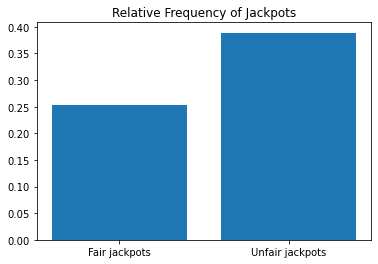

In [8]:
plot.bar(["Fair jackpots","Unfair jackpots"],[(fj/1000), (uj/1000)])
plot.title("Relative Frequency of Jackpots");

## Senario 2: 6 sided die

**For this senario we create 3 standard 6-sided dice, 'fair' is weighted fairly, 'unfair1' is weighted towards 6 by a factor of 5, and 'unfair2' is weighted towards 1 by a factor of 5. The weights of each die are displayed below:**

In [9]:
fair = die([1,2,3,4,5,6])
unfair1 = die([1,2,3,4,5,6])
unfair1.change_weight(6, 5)
unfair2 = die([1,2,3,4,5,6])
unfair2.change_weight(1,5)
print("Fair: \n", fair.display())
print("\n Unfair1: \n ", unfair1.display())
print("\n Unfair2: \n ", unfair2.display())

Fair: 
        Weight
Faces        
1         1.0
2         1.0
3         1.0
4         1.0
5         1.0
6         1.0

 Unfair1: 
         Weight
Faces        
1         1.0
2         1.0
3         1.0
4         1.0
5         1.0
6         5.0

 Unfair2: 
         Weight
Faces        
1         5.0
2         1.0
3         1.0
4         1.0
5         1.0
6         1.0


**Next we use these dice to play two games: a fair game with 6 fair dice, and an unfair game with two unfair1s, one unfair2, and two fair dice. We both sets of dice 10000 times:**

In [10]:
fairgame=game([fair, fair, fair, fair, fair])
fairgame.play(10000)
print("Fair game: \n", fairgame.show_rolls(wide = True))

Fair game: 
        Die 1  Die 2  Die 3  Die 4  Die 5
1          1      2      1      4      2
2          2      3      6      1      3
3          3      6      3      4      5
4          4      1      4      6      4
5          1      3      6      2      5
...      ...    ...    ...    ...    ...
9996       2      2      4      2      4
9997       2      6      3      4      2
9998       2      6      3      4      1
9999       1      5      5      4      2
10000      6      1      5      1      6

[10000 rows x 5 columns]


In [11]:
unfairgame=game([unfair1, unfair1, unfair2, fair, fair])
unfairgame.play(10000)
print("Unfair game: \n", unfairgame.show_rolls())

Unfair game: 
        Die 1  Die 2  Die 3  Die 4  Die 5
1          3      6      1      2      3
2          6      5      1      5      3
3          1      2      4      4      3
4          6      6      5      3      6
5          6      6      1      3      3
...      ...    ...    ...    ...    ...
9996       5      4      1      5      4
9997       3      5      4      6      4
9998       6      6      1      3      2
9999       6      6      6      3      1
10000      6      6      1      5      6

[10000 rows x 5 columns]


**We again analyze the relative frequency of jackpots of the two games:**

In [12]:
fairanalyzer = analyzer(fairgame)
unfairanalyzer = analyzer(unfairgame)

In [13]:
fj = fairanalyzer.jackpot()
print("Relative frequency of fair game jackpots:", fj/10000)

Relative frequency of fair game jackpots: 0.0009


In [14]:
uj = unfairanalyzer.jackpot()
print("Relative frequency of unfair game jackpots:", uj/10000)

Relative frequency of unfair game jackpots: 0.0012


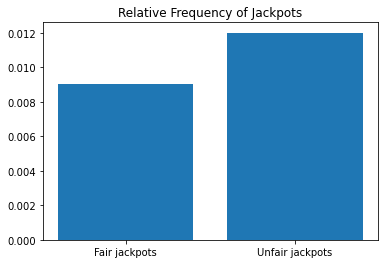

In [15]:
plot.bar(["Fair jackpots","Unfair jackpots"],[(fj/1000), (uj/1000)])
plot.title("Relative Frequency of Jackpots");

We can use the combo and sequence functions to produce multi-index representations of the frequency of each roll combination or roll sequence:

In [16]:
print("Fair game: \n", fairanalyzer.combo(), fairanalyzer.sequence())
print("Unfair game: \n", unfairanalyzer.combo(), unfairanalyzer.sequence())

Fair game: 
            Frequency
0 1 2 3 4           
1 2 3 5 6        169
      4 5        163
        6        156
  3 4 5 6        149
2 3 4 5 6        145
...              ...
  4 4 4 4          3
  2 2 2 2          2
  3 3 3 3          2
  6 6 6 6          2
4 4 4 4 4          1

[250 rows x 1 columns]                                Frequency
Die 1 Die 2 Die 3 Die 4 Die 5           
6     1     5     2     1              9
1     4     5     3     2              7
2     5     2     6     6              7
      4     4     3     6              7
3     5     3     4     1              7
...                                  ...
4     5     2     4     3              1
2     3     5     6     3              1
4     5     2     4     6              1
                  5     1              1
2     2     1     4     6              1

[5637 rows x 1 columns]
Unfair game: 
            Frequency
0 1 2 3 4           
1 2 4 6 6        228
  3 4 6 6        219
  4 5 6 6        195
  2 3 6 6   

**We can also use the combo function to display the most frequent combinations with a string index that can be easily graphed:**

In [17]:
ftt=fairanalyzer.combo(freq = True).head(10)
utt=unfairanalyzer.combo(freq = True).head(10)
print('Most frequent fair game rolls: \n', ftt)
print('\n Most frequent unfair game rolls: \n', utt)

Most frequent fair game rolls: 
                                                        Roll #s Total Frequency
Combination                                                                   
12356        [5, 22, 41, 63, 84, 166, 260, 274, 330, 346, 3...             169
12345        [45, 46, 74, 109, 130, 162, 265, 369, 373, 411...             163
12346        [21, 53, 66, 82, 156, 335, 399, 514, 532, 713,...             156
13456        [182, 333, 403, 408, 445, 459, 466, 485, 652, ...             149
23456        [43, 47, 99, 128, 147, 175, 246, 618, 677, 691...             145
12456        [67, 181, 203, 285, 380, 427, 453, 564, 599, 6...             125
23356        [247, 351, 464, 776, 828, 868, 881, 948, 988, ...             102
23566        [106, 476, 530, 686, 738, 950, 1177, 1332, 135...             101
34556        [295, 364, 450, 452, 615, 890, 966, 995, 1141,...              97
11234        [86, 276, 553, 557, 676, 683, 807, 902, 991, 1...              96

 Most frequent unf

Fair Die:


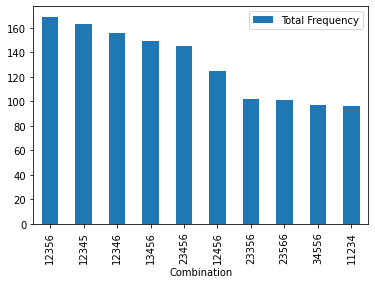

In [18]:
print('Fair Die:')
ftt.plot.bar();

Unfair Die:


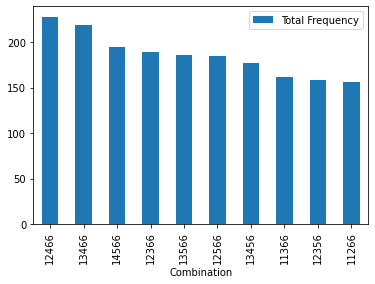

In [19]:
print('Unfair Die:')
utt.plot.bar();

## Senario 3: Alphabet dice

For this senario we create a die with 26 faces containing the letters of the alphabet and we weight the faces according to each letter's frequency of usage in the english language. These faces and weights are displayed below:

In [20]:
alpha = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
die = die(alpha)

In [21]:
freq = [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034, 7.5448, 0.1965, 1.1016, 5.4893, 3.0129, 6.6544, 7.1635, 3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902, 1.7779, 0.2722]
for i in range(0,26):
    die.change_weight(alpha[i], freq[i])
print(die.display())

        Weight
Faces         
a       8.4966
b       2.0720
c       4.5388
d       3.3844
e      11.1607
f       1.8121
g       2.4705
h       3.0034
i       7.5448
j       0.1965
k       1.1016
l       5.4893
m       3.0129
n       6.6544
o       7.1635
p       3.1671
q       0.1962
r       7.5809
s       5.7351
t       6.9509
u       3.6308
v       1.0074
w       1.2899
x       0.2902
y       1.7779
z       0.2722


We can use this die format to play a game where 5 alphabet dice are rolled 1000 times:

In [22]:
game = game([die,die,die,die,die])
game.play(1000)
df = game.show_rolls()
print(df)

     Die 1 Die 2 Die 3 Die 4 Die 5
1        u     c     a     a     m
2        o     f     u     t     e
3        t     g     p     r     e
4        n     c     r     s     e
5        e     o     i     e     n
...    ...   ...   ...   ...   ...
996      l     l     o     b     t
997      e     e     g     p     i
998      w     e     s     i     m
999      r     s     u     t     r
1000     s     r     u     t     a

[1000 rows x 5 columns]


We can represent these rolls as counts of each possible face per roll using the counts function:

In [23]:
analyzer1 = analyzer(game)
pd.set_option('display.max_columns', None)
print(analyzer1.counts())

      a  b  c  d  e  f  g  h  i  j  k  l  m  n  o  p  q  r  s  t  u  v  w  x  \
1     2  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0   
2     0  0  0  0  1  1  0  0  0  0  0  0  0  0  1  0  0  0  0  1  1  0  0  0   
3     0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  1  0  1  0  1  0  0  0  0   
4     0  0  1  0  1  0  0  0  0  0  0  0  0  1  0  0  0  1  1  0  0  0  0  0   
5     0  0  0  0  2  0  0  0  1  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0   
...  .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. ..   
996   0  1  0  0  0  0  0  0  0  0  0  2  0  0  1  0  0  0  0  1  0  0  0  0   
997   0  0  0  0  2  0  1  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0   
998   0  0  0  0  1  0  0  0  1  0  0  0  1  0  0  0  0  0  1  0  0  0  1  0   
999   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  1  1  0  0  0   
1000  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  0  0  0   

      y  z  
1     0  0  
2     0  0  


**We can analyze this by iterating through each row and comparing it to the official list of 5 letter scrabble words:**

In [24]:
rolls_lst = []
for i in range(len(df)):   
    rolls_lst.append(''.join(list(df.iloc[i,:])))

In [25]:
from scrab import scrab_words_5l
real_words = []
for roll in rolls_lst:
    if roll in scrab_words_5l:
        real_words.append(roll)
print(real_words)

['mania', 'stunt', 'lunes', 'lores', 'cures']


**Now that we have found how many real words were created we can find the relative frequency of real words created by rolling 5 alphabet dice:**

In [26]:
print("Relative Frequency: ", len(real_words)/1000)

Relative Frequency:  0.005


# Directory Listing

In [27]:
import os
os.chdir('/Users/meldrumapple/Desktop/DS5100/DS5100_Final')

In [28]:
ls-lR

total 512
-rw-r--r--  1 meldrumapple  staff   1071 Jul 12 18:33 LICENSE.md
-rw-r--r--  1 meldrumapple  staff   7989 Jul 14 10:50 README.md
drwxr-xr-x  4 meldrumapple  staff    128 Jul 13 22:10 __pycache__/
-rw-r--r--  1 meldrumapple  staff  16871 Jul 12 18:33 classes_scratch.ipynb
-rw-r--r--  1 meldrumapple  staff  86478 Jul 14 11:06 final-project-submission.ipynb
drwxr-xr-x  7 meldrumapple  staff    224 Jul 13 22:10 monte/
drwxr-xr-x  6 meldrumapple  staff    192 Jul 14 09:42 monte.egg-info/
-rw-r--r--  1 meldrumapple  staff  82875 Jul 14 09:24 montecarlo_demo.ipynb
-rw-r--r--  1 meldrumapple  staff   2304 Jul 14 10:52 montecarlo_test.py
-rw-r--r--  1 meldrumapple  staff    608 Jul 12 18:30 montecarlo_test_results.txt
-rw-r--r--  1 meldrumapple  staff    114 Jul 12 18:33 scrab.py
-rw-r--r--  1 meldrumapple  staff    315 Jul 14 09:42 setup.py
-rw-r--r--  1 meldrumapple  staff  34542 Jul 12 18:33 sgb-words.txt

./__pycache__:
total 32
-rw-r--r--  1 meldrumapple  staff  9608 Jul 12 18:33

# Installation Output Listing

Command line code to install my package successfully:

In [ ]:
(base) Kates-MacBook-Air:DS5100_Final meldrumapple$ pip install -e .

Obtaining file:///Users/meldrumapple/Desktop/DS5100/DS5100_Final

Installing collected packages: monte

     Running setup.py develop for monte
  
Successfully installed monte-0.1

The contents of my py installation test file located within my RA repository:

In [ ]:
from monte.montecarlo import *
    die1 = die([1,2,3])
    print(die1.display())

Running said test file:

In [31]:
import os
os.chdir('/Users/meldrumapple/Desktop/DS5100/DS5100-2022-06-RA')
!python final_install_test.py

Welcome to montecarlo
       Weight
Faces        
1         1.0
2         1.0
3         1.0
